In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os 

In [2]:
df=pd.read_csv('playstore_analysis_1.csv')

In [3]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.00000,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.00000,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.00000,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.00000,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53000.00000,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600.00000,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9500.00000,"1,000+",Free,0,Everyone,Medical,20-Jan-17,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,21516.52952,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device


# Data Processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Rating,Reviews,Size
count,9367.000000,1.084100e+04,10841.000000
mean,4.191513,4.441119e+05,21516.529524
std,0.515735,2.927629e+06,20746.537567
min,1.000000,0.000000e+00,8.500000
25%,4.000000,3.800000e+01,5900.000000
50%,4.300000,2.094000e+03,18000.000000
75%,4.500000,5.476800e+04,26000.000000
max,5.000000,7.815831e+07,100000.000000


In [6]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,1.084100e+04,10841.000000,10841,10840,10841,10841,10841,10841,10833,10838
unique,9660,33,NaN,NaN,NaN,21,2,92,6,119,1377,2783,33
top,ROBLOX,FAMILY,NaN,NaN,NaN,"1,000,000+",Free,0,Everyone,Tools,3-Aug-18,Varies with device,4.1 and up
freq,9,1972,NaN,NaN,NaN,1579,10040,10041,8715,842,326,1459,2451
mean,NaN,NaN,4.191513,4.441119e+05,21516.529524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.515735,2.927629e+06,20746.537567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,8.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,3.800000e+01,5900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,2.094000e+03,18000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,5.476800e+04,26000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
#Changing the column name of the given dataset

In [9]:
df.rename({'Content Rating':'Content_Rating','Last Updated':'Last_Updated','Current Ver':'Current_Ver','Android Ver':'Android_Ver'},axis=1,inplace=True)

In [10]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Current_Ver',
       'Android_Ver'],
      dtype='object')

In [11]:
type(df)

pandas.core.frame.DataFrame

In [12]:
df.shape

(10841, 13)

In [13]:
df.ndim

2

In [14]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

# Tasks

# 1. Data clean up – Missing value treatment

# a. Drop records where rating is missing since rating is our target/study variable

In [15]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Current_Ver          8
Android_Ver          3
dtype: int64

In [16]:
df[df.Rating.isnull()].index 

Int64Index([   23,   113,   123,   126,   129,   130,   134,   163,   180,
              185,
            ...
            10816, 10818, 10821, 10822, 10823, 10824, 10825, 10831, 10835,
            10838],
           dtype='int64', length=1474)

In [17]:
df.drop(index=df[df.Rating.isnull()].index,inplace=True)

In [18]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       4
Android_Ver       3
dtype: int64

Droped all null values which was present in the columns in "Rating"

# b. Check the null values for the Android Ver column. 

i. Are all 3 records having the same problem?

In [19]:
df[df['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.00000,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.00000,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,PERSONALIZATION,1.9,19,21516.52952,"100,000+",Free,0,Everyone,Personalization,11-Feb-18,1.0.19,NaN


Yes all 3 recordes having same problem

ii. Drop the 3rd record i.e. record for “Life Made WIFI …”

In [20]:
df.drop([10472],inplace=True)

In [21]:
df[df['Android_Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,20-Jul-18,4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,27-Mar-18,1.1,NaN


Droped 3rd record i.e "Life Made WIFI"

iii. Replace remaining missing values with the mode

In [22]:
x=df['Android_Ver'].mode()[0]
x

'4.1 and up'

In [23]:
df.Android_Ver.fillna(x,inplace=True)

In [24]:
df[df.Android_Ver.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


replaced missing value with mode

# c. Current ver – replace with most common value

In [25]:
y=df.Current_Ver.mode()[0]
y

'Varies with device'

In [26]:
df.Current_Ver.fillna(y,inplace=True)

In [27]:
df[df.Current_Ver.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


replaced most common value with mode

In [28]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content_Rating    0
Genres            0
Last_Updated      0
Current_Ver       0
Android_Ver       0
dtype: int64

 # 2. Data clean up – correcting the data types


# a. Which all variables need to be brought to numeric types?

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


we need to brought Installs and Price variable in numeric type

# b. Price variable – remove $ sign and convert to float


In [30]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

In [31]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0.0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0.0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0.0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


 removed '$' and also changed Datatype

# c. Installs – remove ‘,’ and ‘+’ sign, convert to integer


In [32]:
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',','').str.replace('+',''))

In [33]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,50000,Free,0.0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,1000000,Free,0.0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,10000,Free,0.0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up


removed ',','+' and also changed Datatype

# d. Convert all other identified columns to numeric

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content_Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last_Updated    9366 non-null   object 
 11  Current_Ver     9366 non-null   object 
 12  Android_Ver     9366 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


converted all other identified columns into numeric datatype

# 3. Sanity checks – check for the following and handle accordingly

# a. Avg. rating should be between 1 and 5, as only these values are allowed on the play store. 

# i. Are there any such records? Drop if so.

In [35]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up


In [36]:
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


 There are no such records which have rating greater than 5, so we don't need to drop anything from the given dataset 

# b. Reviews should not be more than installs as only those who installed can review the app.

# i. Are there any such records? Drop if so.

In [37]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,Free,0.00,Everyone,Medical,2-Aug-18,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,Paid,2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,Paid,1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,Free,0.00,Everyone,Arcade,23-Jul-18,1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,Free,0.00,Everyone,Arcade,11-Mar-17,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.00000,10,Free,0.00,Teen,Social,23-Jul-18,1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.00000,1,Paid,0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up


In [38]:
sum(df['Reviews']>df['Installs'])

7

In [39]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.00000,1,Free,0.00,Everyone,Medical,2-Aug-18,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.52952,10000,Paid,2.49,Everyone,Lifestyle,30-Jul-18,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.00000,1,Paid,1.49,Everyone,Arcade,8-Feb-17,1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.00000,5,Free,0.00,Everyone,Arcade,23-Jul-18,1,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.00000,10,Free,0.00,Everyone,Arcade,11-Mar-17,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.00000,10,Free,0.00,Teen,Social,23-Jul-18,1,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.00000,1,Paid,0.99,Everyone,Arcade,3-Mar-17,1,2.3 and up


In [40]:
df[df['Reviews']>df['Installs']].index

Int64Index([2454, 4663, 5917, 6700, 7402, 8591, 10697], dtype='int64')

In [41]:
df.drop(index=df[df['Reviews']>df['Installs']].index,inplace=True)

In [42]:
df[df['Reviews']>df['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


After performing the operations, we found 7 such records which were greater than the installs so we droped those records
So, now there are no such records that is Review which are greater than the installs

# 4. Identify and handle outliers – 


# a. Price column

# i. Make suitable plot to identify outliers in price

<AxesSubplot:>

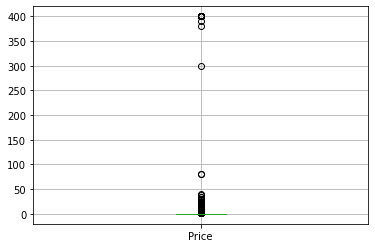

In [43]:
df.boxplot('Price')

so here i ploted boxplot for the variable Price and we can see that there are some outliers present in the price column,there are outliers beyond value 50

# ii. Do you expect apps on the play store to cost $200? Check out these cases


In [44]:
df[df.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,3-May-18,1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,12-Jan-18,2,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,19-May-18,3,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,21-Jul-18,1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,1-Jul-18,1,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,11-Dec-17,1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,1-May-17,3.4,4.4 and up


In [45]:
sum(df.Price>200)

15

In [46]:
df[df.Price>200].index

Int64Index([4197, 4362, 4367, 5351, 5354, 5355, 5356, 5357, 5358, 5359, 5362,
            5364, 5366, 5369, 5373],
           dtype='int64')

In [47]:
df.drop(index=df[df.Price>200].index,inplace=True)

In [48]:
df[df.Price>200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver


so we found almost 15 records apps price which is greater than 200$, so i droped it 

# iii. After dropping the useless records, make the suitable plot again to identify outliers

<AxesSubplot:>

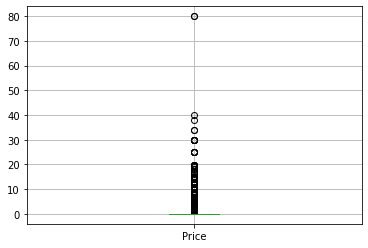

In [49]:
df.boxplot('Price')

After droped useless records we can see that here some outliers still present in the price column, so we can drop those outliers also

# iv. Limit data to records with price < $30


In [50]:
sum(df.Price<30)

9338

9338 records found which price is less than 30$

# b. Reviews column


# i. Make suitable plot

array([[<AxesSubplot:title={'center':'Reviews'}>]], dtype=object)

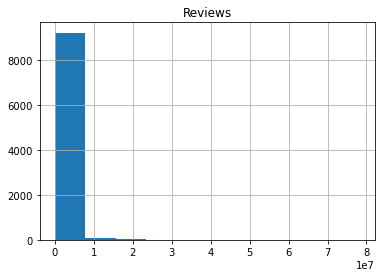

In [51]:
df.hist('Reviews')

Ploted histogram 

# ii. Limit data to apps with < 1 Million reviews

In [52]:
sum(df.Reviews<1000000)

8640

Found 8640 apps records which Reviews is greater than 1 million 

# c. Installs


# i. What is the 95th percentile of the installs?


In [53]:
df.Installs.quantile(0.95)

100000000.0

# ii. Drop records having a value more than the 95th percentile


In [54]:
df[df.Installs>df.Installs.quantile(0.95)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,21516.52952,1000000000,Free,0.0,Teen,Books & Reference,3-Aug-18,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.52952,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.52952,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,21516.52952,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,21516.52952,1000000000,Free,0.0,Everyone,Communication,2-Aug-18,Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5395,Google Photos,PHOTOGRAPHY,4.5,10847682,21516.52952,1000000000,Free,0.0,Everyone,Photography,1-Aug-18,Varies with device,Varies with device
5596,Samsung Health,HEALTH_AND_FITNESS,4.3,480208,70000.00000,500000000,Free,0.0,Everyone,Health & Fitness,31-Jul-18,5.17.2.009,5.0 and up
5856,Google Play Games,FAMILY,4.3,7168735,21516.52952,1000000000,Free,0.0,Teen,Entertainment,16-Jul-18,Varies with device,Varies with device
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.52952,500000000,Free,0.0,Everyone,Tools,4-Aug-18,4.6.6,Varies with device


In [55]:
sum(df.Installs>df.Installs.quantile(0.95))

130

In [56]:
df[df.Installs>df.Installs.quantile(0.95)].index

Int64Index([ 152,  335,  336,  338,  340,  341,  342,  347,  371,  378,
            ...
            4222, 4234, 4365, 4566, 4676, 5395, 5596, 5856, 7536, 9844],
           dtype='int64', length=130)

In [57]:
df.drop(index=df[df.Installs>df.Installs.quantile(0.95)].index,inplace=True)

Here, we have droped all the Installs Values which are more than 95th percentile

# Data analysis to answer business questions

# 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower values?

C:\Users\DW-1217\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

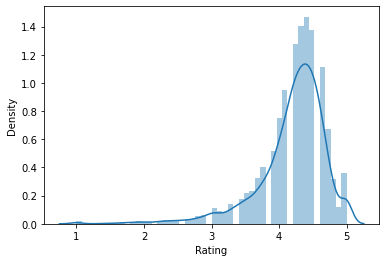

In [58]:
sns.distplot(df.Rating)

In [59]:
df.Rating.skew()

-1.8416513505231236

Calculated skewed value for column Rating

# a. How do you explain this?

we can see above plot is left skewed plot so here we can say that the above plot skewness value is in negative like we found it also and we can called it as a left skewed plot 

# b. What is the implication of this on your analysis?

if there is negative skew in our plot that means the plot tails is on left side and if the tail is on right thats means it is positive skew, if we want the right model from the dataset we have then we should remove the skeweness from the data 

# 6. What are the top Content Rating values?

# a. Are there any values with very few records?

In [60]:
df.Content_Rating.value_counts()

Everyone           7309
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

yes Content_Rating 'Adults only 18+' and 'Unrated' have very few records 

# b. If yes, drop those as they won’t help in the analysis


In [61]:
df.Content_Rating.value_counts()

Everyone           7309
Teen               1055
Mature 17+          458
Everyone 10+        388
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64

In [62]:
df[df.Content_Rating=='Adults only 18+'].index

Int64Index([298, 3043, 6424], dtype='int64')

In [63]:
df[df.Content_Rating=='Unrated'].index

Int64Index([8266], dtype='int64')

In [64]:
df.drop(index=df[df.Content_Rating=='Adults only 18+'].index,inplace=True)
df.drop(index=df[df.Content_Rating=='Unrated'].index,inplace=True)

In [65]:
df.Content_Rating.value_counts()

Everyone        7309
Teen            1055
Mature 17+       458
Everyone 10+     388
Name: Content_Rating, dtype: int64

okay i droped 'Adults only 18+' and 'Unrated' values

# 7. Effect of size on rating 

# a. Make a joinplot to understand the effect of size on rating


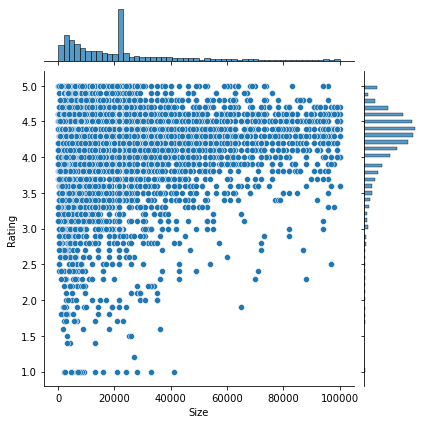

In [66]:
sns.jointplot(x='Size',y='Rating', data=df)

# b. Do you see any patterns?


Yes, from the given plot, we can say that there is correlation between Size and Rating

# c. How do you explain the pattern?

From the given plot, we can see that, on increase in the Rating, the size also increases and there is positive correlation between Size and Rating

# 8. Effect of price on rating

# a. Make a jointplot (with regression line)

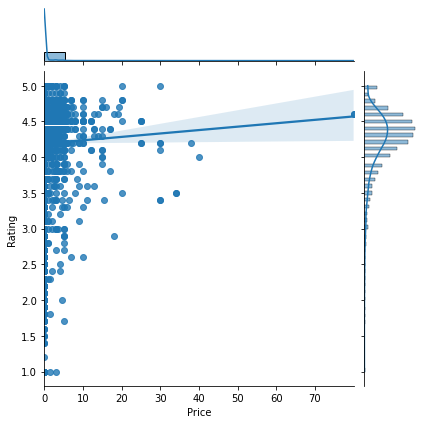

In [67]:
sns.jointplot(x='Price',y='Rating',data=df,kind='reg')

# b. What pattern do you see?

From the given plot, we can say that, on increase in the Price, the Rating remains constant which is greater than 4

# c. How do you explain the pattern?

So, here as on increase in price the rating remains constant which greater than 4 so we can say that, there is weak positive correlation between Rating and Price

# d. Replot the data, this time with only records with price > 0 

In [68]:
a=df[df.Price>0]
a

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Current_Ver,Android_Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4.99,Everyone,Business,25-Mar-18,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4.99,Everyone,Business,11-Apr-17,3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6800.00000,100000,Paid,4.99,Everyone,Business,25-Mar-18,1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39000.00000,100000,Paid,4.99,Everyone,Business,11-Apr-17,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,21516.52952,100000,Paid,3.99,Everyone,Communication,5-Jul-18,7.5.3.20547,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10682,Fruit Ninja Classic,GAME,4.3,85468,36000.00000,1000000,Paid,0.99,Everyone,Arcade,8-Jun-18,2.4.1.485300,4.0.3 and up
10690,FO Bixby,PERSONALIZATION,5.0,5,861.00000,100,Paid,0.99,Everyone,Personalization,25-Apr-18,0.2,7.0 and up
10760,Fast Tract Diet,HEALTH_AND_FITNESS,4.4,35,2400.00000,1000,Paid,7.99,Everyone,Health & Fitness,8-Aug-18,1.9.3,4.2 and up
10782,Trine 2: Complete Story,GAME,3.8,252,11000.00000,10000,Paid,16.99,Teen,Action,27-Feb-15,2.22,5.0 and up


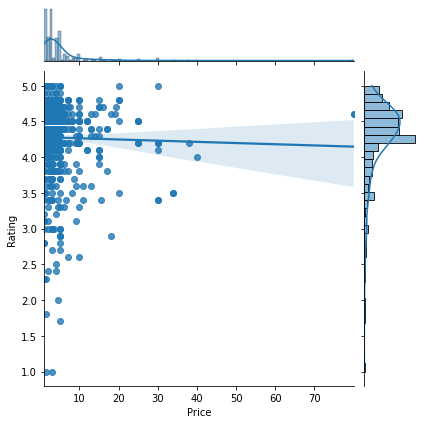

In [69]:
sns.jointplot(x='Price',y='Rating',data=a,kind='reg')

# e. Does the pattern change?

Yes, the patter has changed as we have given the condition to the data as Price>0 so we can say that there is negative correlation between Price and Rating

# f. What is your overall inference on the effect of price on the rating

So, from this we can say that, on increase in the price, it doesn't have any effect on the higher rating and the rating is almost constant which is 4

# 9. Look at all the numeric interactions together – 

# a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'


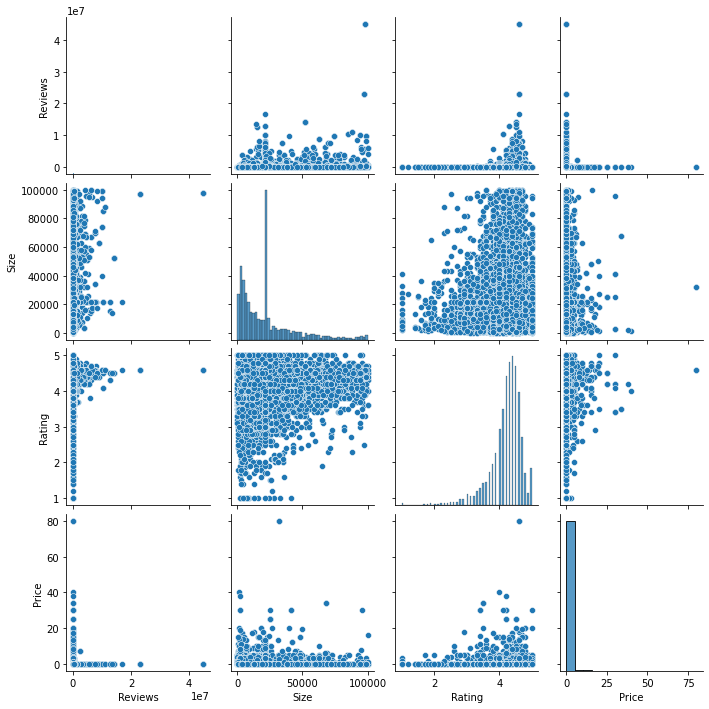

In [70]:
sns.pairplot(df,vars=['Reviews','Size','Rating','Price'])

# 10. Rating vs. content rating

# a. Make a bar plot displaying the rating for each content rating


<AxesSubplot:xlabel='Content_Rating'>

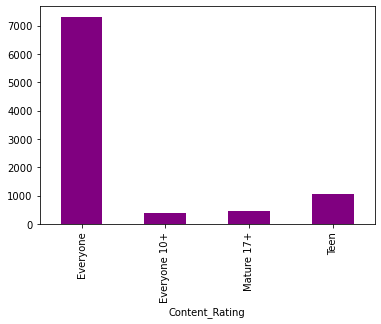

In [71]:
df.groupby(['Content_Rating'])['Rating'].count().plot.bar(color='Purple')

# b. Which metric would you use? Mean? Median? Some other quantile?

we mostly use median for remove the outlier as we have outlier in the Rating,Median is the best measure of central tendency to overcome the outlier

# c. Choose the right metric and plot

<AxesSubplot:xlabel='Content_Rating'>

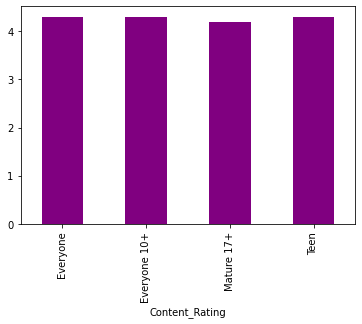

In [72]:
df.groupby(['Content_Rating']).Rating.median().plot.bar(color='Purple')

# 11. Content rating vs. size vs. rating – 3 variables at a time

# a. Create 5 buckets (20% records in each) based on Size

In [73]:
bins=[0,20000,40000,60000,80000,100000]
labels=['0k-20k','20k-40k','40-60','60k-80k','80k-100k']
df['Buckets']=pd.cut(df['Size'],bins,labels=labels)
pd.pivot_table(df,index='Buckets',values='Rating',columns='Content_Rating')

Content_Rating,Everyone,Everyone 10+,Mature 17+,Teen
Buckets,,,,
0k-20k,4.149182,4.247561,4.015183,4.190289
20k-40k,4.226711,4.194413,4.193370,4.237500
40-60,4.192857,4.265957,4.202222,4.270896
60k-80k,4.265368,4.356818,4.190909,4.291045
80k-100k,4.280000,4.405556,4.252632,4.314815


# b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [74]:
new_quant=pd.pivot_table(df,index='Buckets',values='Rating',columns='Content_Rating',aggfunc=lambda x:np.quantile(x,0.2))
new_quant

Content_Rating,Everyone,Everyone 10+,Mature 17+,Teen
Buckets,,,,
0k-20k,3.8,4.02,3.5,3.9
20k-40k,4.0,4.00,4.0,4.0
40-60,3.9,4.10,4.1,4.0
60k-80k,4.0,4.20,4.0,4.0
80k-100k,4.1,4.30,4.0,4.1


# c. Make a heatmap of this

# i. Annotated

<AxesSubplot:xlabel='Content_Rating', ylabel='Buckets'>

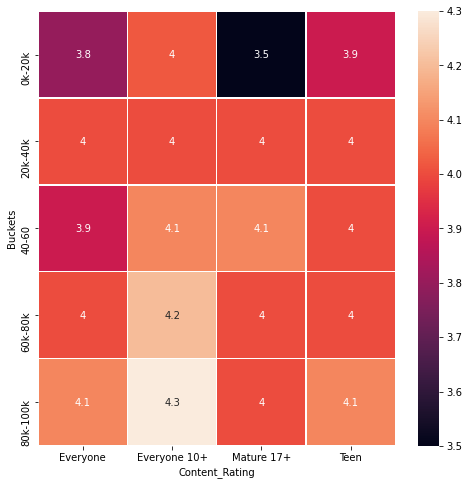

In [75]:
plt.subplots(figsize=(8,8))
sns.heatmap(new_quant,annot=True, linewidths=.1)

# ii. Greens color map

<AxesSubplot:xlabel='Content_Rating', ylabel='Buckets'>

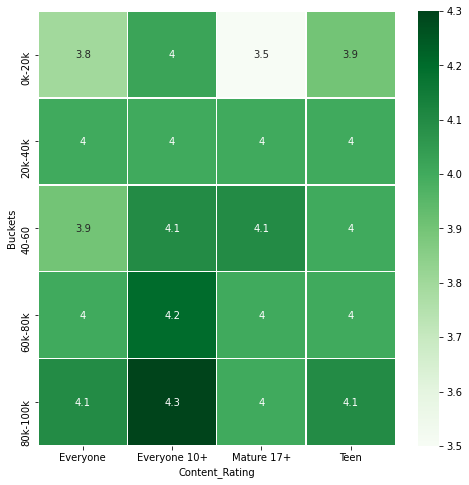

In [76]:
plt.subplots(figsize=(8,8))
sns.heatmap(new_quant,annot=True, cmap='Greens', linewidths=.1)

# d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

after analysis and plots we can see that the Apps with siz 40k-60k to 80k-100k have most rating and also we can say that the Size 80K-100K has higher rating. so in short we can say that, whatever the heavier apps are there, they are preferred more in all the caregories